In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math

In [2]:
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [30]:
print(boston_df.columns, '\n')
print(boston_df.describe())

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object') 

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.0

# Task 4: Generate Descriptive Statistics and Visualization

**Question 1:** For the median value of owner-occupied homes or MEDV Variable provide a boxplot.

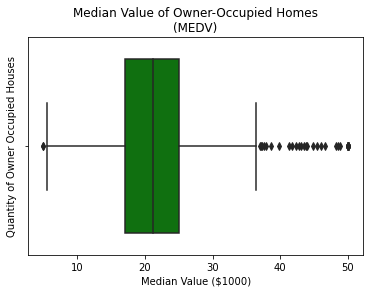

In [31]:
boston_medv = sns.boxplot(x='MEDV', color='g', data=boston_df)
boston_medv.set(title='Median Value of Owner-Occupied Homes\n(MEDV)', xlabel='Median Value ($1000)', ylabel='Quantity of Owner Occupied Houses')
plt.show()

In [32]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

**Interpretation:** From the above visualization, we can now see that the median value of owner-occupied homes is somewhere around USD 21.000 with IQR (Inter Quartile Range) around USD 17.000 to USD 25.000 and those outliers that spread between USD 5.000 to USD 50.000.

**Question 2:** Provide a histogram for the Charles River or CHAS variable in which it values 1 if tract bounds river and 0 if otherwise.

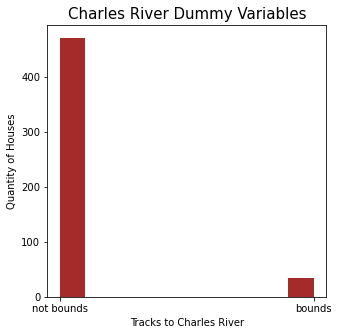

In [33]:
boston_df.loc[(boston_df['CHAS'] == 1), 'chas_group'] = 'bounds'
boston_df.loc[(boston_df['CHAS'] == 0), 'chas_group'] = 'not bounds'

plt.figure(figsize=(5,5))
plt.hist(boston_df['chas_group'], color='brown')
plt.title('Charles River Dummy Variables', fontsize=15)
plt.xlabel('Tracks to Charles River', fontsize=10)
plt.ylabel('Quantity of Houses', fontsize=10)
plt.show()

In [34]:
quant, _ = boston_df.shape
unbounded_houses, _ = boston_df[(boston_df['CHAS'] == 0)].shape
bounded_houses = quant - unbounded_houses

unbounded_fraction = unbounded_houses/quant
bounded_fraction = bounded_houses/quant

print('The details are\nTotal Houses: {0}\nUnbounded Houses: {1}\nBounded Houses: {2}'.format(quant, unbounded_houses, bounded_houses), '\n')
print('The percentage of Unbounded Houses is {:.0%}, while the Bounded Houses is {:.0%}'.format(unbounded_fraction, bounded_fraction))

The details are
Total Houses: 506
Unbounded Houses: 471
Bounded Houses: 35 

The percentage of Unbounded Houses is 93%, while the Bounded Houses is 7%


**Interpretation:** From the visualization, we can conclude that the number of Boston houses tracks that are bounded to the charles river (35 houses/7%) are much lower than those that are not (471 houses/93%).

**Question 3:** Provide a boxplot for the MEDV variable vs the AGE variable with AGE variable being discretize into three groups

In [35]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 & 70 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

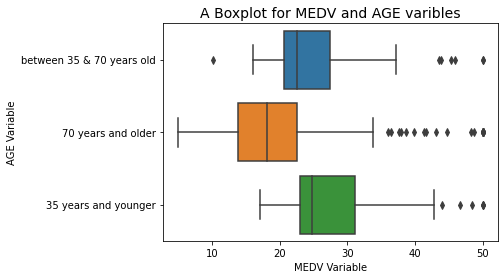

In [36]:
boston_medv_age = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
boston_medv_age.set_title('A Boxplot for MEDV and AGE varibles', fontsize=14)
boston_medv_age.set(xlabel='MEDV Variable', ylabel='AGE Variable')
plt.show()

In [37]:
younger = boston_df[boston_df['age_group'] == '35 years and younger']
in_between = boston_df[boston_df['age_group'] == 'between 35 & 70 years old']
older = boston_df[boston_df['age_group'] == '70 years and older']

print('The age group of 35 years and younger\n', younger['MEDV'].describe(), '\n')
print('The age group of 35 to 70 years old\n', in_between['MEDV'].describe(), '\n')
print('The age group of 70 years and older\n', older['MEDV'].describe())

The age group of 35 years and younger
 count    91.000000
mean     27.775824
std       7.638198
min      17.100000
25%      23.050000
50%      24.800000
75%      31.150000
max      50.000000
Name: MEDV, dtype: float64 

The age group of 35 to 70 years old
 count    128.000000
mean      24.947656
std        6.969370
min       10.200000
25%       20.675000
50%       22.600000
75%       27.425000
max       50.000000
Name: MEDV, dtype: float64 

The age group of 70 years and older
 count    287.000000
mean      19.793380
std        9.515375
min        5.000000
25%       13.800000
50%       18.200000
75%       22.550000
max       50.000000
Name: MEDV, dtype: float64


**Interpretation:** From the visualization above, we can now conclude that the age group of 70 years and older has median value (USD 18.200) lower than the other age groups, while having the same Q3 outliers (USD 50.000).

**Question 4:** Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

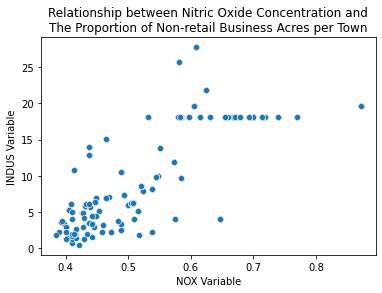

In [38]:
boston_scatter = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
boston_scatter.set_title('Relationship between Nitric Oxide Concentration and\nThe Proportion of Non-retail Business Acres per Town')
boston_scatter.set(xlabel='NOX Variable', ylabel='INDUS Variable')
plt.show()

In [3]:
x = boston_df['NOX']
y = boston_df['INDUS']
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           7.91e-98
Time:                        07:47:38   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

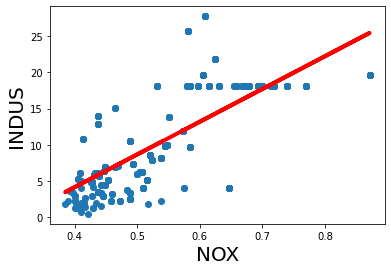

In [6]:
x = boston_df['NOX']

plt.scatter(x,y)
yhat = 45.211*x-13.941
fig = plt.plot(x,yhat,lw=4,c='red',label='Regression Analysis')
plt.xlabel('NOX', fontsize=20)
plt.ylabel('INDUS', fontsize=20)
plt.show()

**Interpretation:** From the visualization, we can see that the Nitric Oxide Concentration (NOX Variable) has a strong relationship with The Proportion of Non-Retail Business Acres per Town (INDUS Variable).

**Question 5:** Create a histogram for the pupil to teacher ratio variable

In [39]:
min_val = math.floor(boston_df['PTRATIO'].min())
max_val = math.ceil(boston_df['PTRATIO'].max())

total_bins = []
for n in range(min_val, max_val, 1): total_bins.append(n)

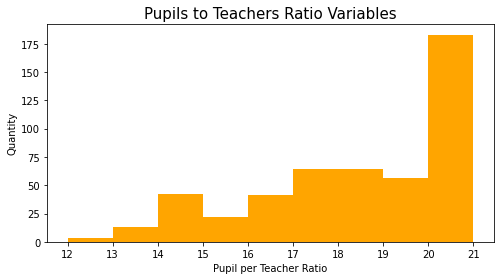

In [40]:
plt.figure(figsize=(8,4))
plt.hist(boston_df['PTRATIO'], bins=total_bins, color='orange')
plt.title('Pupils to Teachers Ratio Variables', fontsize=15)
plt.xlabel('Pupil per Teacher Ratio')
plt.ylabel('Quantity')
plt.xticks(range(min_val, max_val, 1))
plt.show()

In [41]:
boston_df.loc[(boston_df['PTRATIO'] <= 16), 'ptratio_group'] = 'less than 16'
boston_df.loc[(boston_df['PTRATIO'] > 16), 'ptratio_group'] = 'more than 16'

less_ = boston_df[boston_df['ptratio_group'] == 'less than 16']
more_ = boston_df[boston_df['ptratio_group'] == 'more than 16']

print('For pupil-teacher ratio less than 16')
print(less_['PTRATIO'].describe(), '\n')
print('For pupil-teacher ratio more than 16')
print(more_['PTRATIO'].describe())

For pupil-teacher ratio less than 16
count    85.000000
mean     14.620000
std       0.892669
min      12.600000
25%      14.700000
50%      14.700000
75%      15.200000
max      16.000000
Name: PTRATIO, dtype: float64 

For pupil-teacher ratio more than 16
count    421.000000
mean      19.229929
std        1.377595
min       16.100000
25%       18.200000
50%       19.600000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


In [42]:
less_numerator = less_['PTRATIO'].count()
more_numerator = more_['PTRATIO'].count()
denominator = boston_df['PTRATIO'].count()

less_fraction = less_numerator/denominator
more_fraction = more_numerator/denominator 

print('The percentage of pupil-ratio of at least 16 is {:.0%}'.format(less_fraction))
print('The percentage of pupil-ratio of more than 16 is {:.0%}'.format(more_fraction))

The percentage of pupil-ratio of at least 16 is 17%
The percentage of pupil-ratio of more than 16 is 83%


**Interpretation:** From the visualization above, we can see that the pupil-ratio of at least 16 (85 towns/17%) is less common among the towns. It means that most towns (421 towns/83%) have pupil-ratio of more than 16.

# Task 5: Use the Appropriate Test to Answer the Questions Provided

**Question 1:** Is there a significant difference in median value of houses bounded by the Charles River or not?

    The Null Hypothesis: There is no difference in median value of houses bounded by the Charles River.
    The Alternative Hypothesis: There is significant difference in median value of houses bounded by the Charles River.

In [43]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Interpretation:** We set the alpha to 0.05 and we get the p-value of 0.0035, that means that we have sufficient evidence to reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded and unbounded by the Charles River.

**Question 2:** Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

    The Null Hypothesis: There is no difference in median value of houses across three different age groups for owner-occupied units built prior to 1940.
    The Alternative Hypothesis: There is some difference in median value of houses across three different age groups for owner-occupied units built prior to 1940.

In [44]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 & 70 years old']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

levene_stats, p_value = scipy.stats.levene(thirtyfive_lower, thirtyfive_seventy, seventy_older, center='mean')
print('Levene Statisics: {0}, P-Value: {1}'.format(levene_stats, p_value))

Levene Statisics: 2.7806200293748304, P-Value: 0.06295337343259205


In [45]:
f_stats, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print('F Statistics: {0}, P-Value: {1}'.format(f_stats, p_value))

F Statistics: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Interpretation:** We set the alpha to 0.05 and when we do levene & anova test, we get the p-value of 0.06 and 1.71. It means that we can reject the null hypothesis as we have enough evidence to say that there is statistically signicant difference in median value of houses across three different groups for owner-occupied units built prior to 1940.

**Question 3:** Can we conclude that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town?

    The Null Hypohesis: There is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town.
    The Alternative Hypothesis: There is a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

In [46]:
pearson_stats, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print('Pearson Statistics: {0}, P-Value: {1}'.format(pearson_stats, p_value))

Pearson Statistics: 0.7636514469209151, P-Value: 7.913361061238693e-98


**Interpretation:** We set the alpha to 0.05 and when we do Pearson Statistics we get the pearsonr of 0.7 and the p-value (sig. (2 tailed)) of 7.91. It means that we reject the null hypothesis and conclude that there is a strong relationship between the two variables.

**Question 4:** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

    The Null Hypothesis: There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied houses.
    The Alternative Hypothesis: There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied houses.

In [47]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        05:19:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** We set the alpha to 0.05 and when we do regression analysis, we get the p-value (Sig. (two tailed)) of 1.21 and r squared value of 0.062. It means that we can reject the null hypothesis and we can also conclude that there is a positive correlation between the two variables.